In [1]:
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

#Matplotliv visualization
import matplotlib.pyplot as plt
%matplotlib inline

#set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Data Cleaning

In [2]:
###Data clearning and Formatting

data = pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [3]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

In [4]:
# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available': np.nan})

# iterate through the columns
for col in list(data.columns):
    # select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in col or 'therms' in col or 'gal' in col or 'Score' in col):
        data[col] = data[col].astype(float)

In [5]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
    #Total missing values
    mis_val = df.isnull().sum()
    
    #percentage of missing values
    mis_val_percent = 100*df.isnull().sum() / len(df)
    
    #make table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Make a table with the results
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0:'Missing Values', 1:'% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    #Print some summary information
    print("Your selected dataframes has" + str(df.shape[1]) + 'columns.\n'
         'There are' + str(mis_val_table_ren_columns.shape[0]) + 'columns that have missing values')
    
    #return the dataframe with missing information
    return mis_val_table_ren_columns

In [7]:
missing_values_table(data)

Your selected dataframes has60columns.
There are46columns that have missing values


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


In [8]:
#get columns with >50% missing
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns' % len(missing_columns))

Your selected dataframes has60columns.
There are46columns that have missing values
We will remove 11 columns


In [9]:
#Drop the columns
data = data.drop(columns =list(missing_columns))

# Exploratory Data Analysis

Text(0.5, 1.0, 'Energy Star Score Distribution')

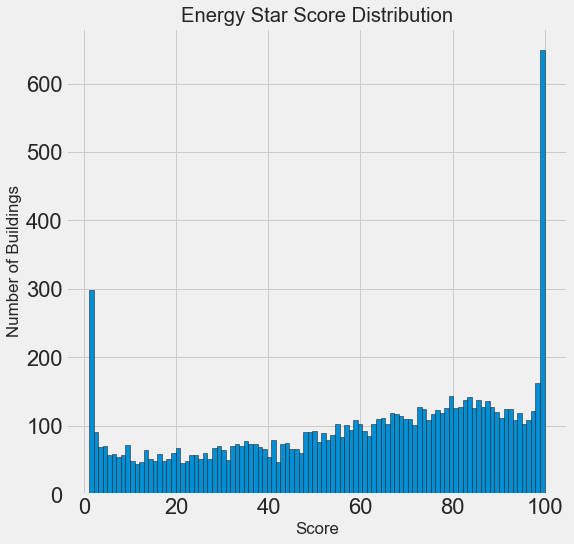

In [10]:
#single variable plots for Energy Start Score

figsize(8, 8)

#Rename the score
data = data.rename(columns={'ENERGY STAR Score': 'score'})

#histogram of energy start score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')

Text(0.5, 1.0, 'Site EUI Distribution')

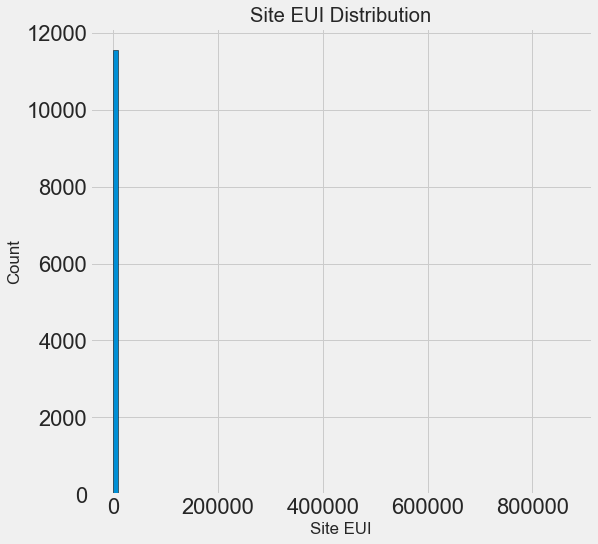

In [11]:
# Histogram Plot of Site EUI
figsize(8,8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins=100, edgecolor='black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

In [12]:
#Outliers in Site EUI
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [13]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [14]:
data.loc[data['Site EUI (kBtu/ft²)']==869265,:]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


In [15]:
#calculate outliers
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

#interquartile range
print(first_quartile, third_quartile)
iqr = third_quartile - first_quartile

#Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile-3*iqr)) &
           (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3*iqr))]
data.head()

61.8 97.6


,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
12,15,2637863,Cadman Towers,2637863,Cadman Towers,3002320001;3002380035,3002320001;3002380035,3001727;3319420,101 Clark St,11201,NaN,NaN,NaN,NaN,Multifamily Housing,"Multifamily Housing, Other, Parking",Multifamily Housing,412503.0,1903,2,100,Whole Building,Whole Building,93.0,32.0,NaN,7.5,0.0,NaN,2047200.0,20472.0,11241926.1,3249755.2,1194.0,150.8,1043.2,432503.0,22061.0,51.01,87.9,04/28/2017 04:07:55 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
17,20,2777309,Barnard College,2777309,Barnard College,1019890001,1-01989-0001,1082351;1079204;1082351;1082347;1079205;1082350,3009 Broadway,10029,NaN,NaN,NaN,NaN,College/University,"College/University, Residence Hall/Dormitory",College/University,323000.0,1907,7,100,Whole Building,NaN,NaN,120.0,125.2,8.7,0.9,193.6,52441239.4,556997.6,17958140.6,5217062.4,4554.7,2888.2,1666.5,598000.0,NaN,NaN,188.7,05/01/2017 12:50:51 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
18,21,2780056,720-730 Ft. Washington Owners Corp.,2780056,720-730 Ft. Washington Owners Corp.,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,720-730 Ft. Washington Ave.,10040,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,321464.0,1939,2,100,Whole Building,Whole Building,72.0,76.2,79.9,3.5,0.0,106.2,880200.0,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464.0,5915.6,18.40,103.3,05/01/2017 10:09:31 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
19,22,4988574,- 720 Ft. Washington Ave. bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800614,1021800614,1064475,720-730 Ft. Washington Ave.,10040,720,FT WASHINGTON AVENUE,Manhattan,179130.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,204720.0,1939,1,100,Whole Building,NaN,67.0,75.7,79.0,4.0,0.0,109.1,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720.0,NaN,NaN,106.6,05/01/2017 10:09:31 PM,NaN,In Compliance,40.857943,-73.934962,12.0,10.0,281.0,Washington Heights North ...
20,23,4988569,- 730 Ft. Washington Ave bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800628,1021800628,1064476;1803806,720-730 Ft. Washington Ave.,10040,730,FT WASHINGTON AVENUE,Manhattan,102150.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,116744.0,1939,1,100,Whole Building,NaN,80.0,77.1,82.7,2.6,0.0,102.8,326760.6,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744.0,NaN,NaN,97.7,05/01/2017 10:09:31 PM,Yes,In Compliance,40.858256,-73.934734,12.0,10.0,281.0,Washington Heights North ...


Text(0.5, 1.0, 'Site EUI Distribution')

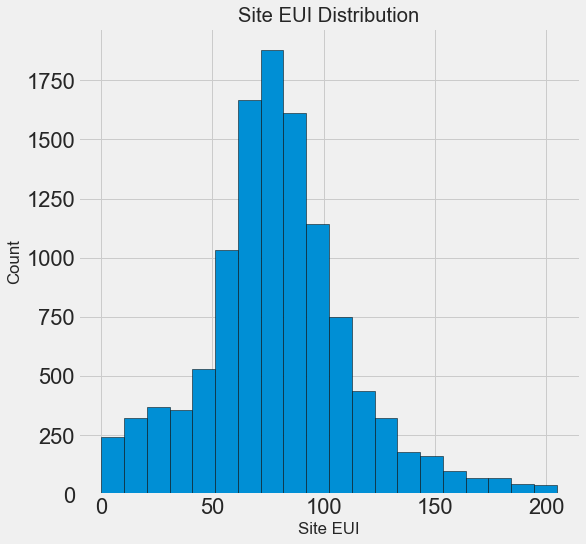

In [16]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

In [17]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

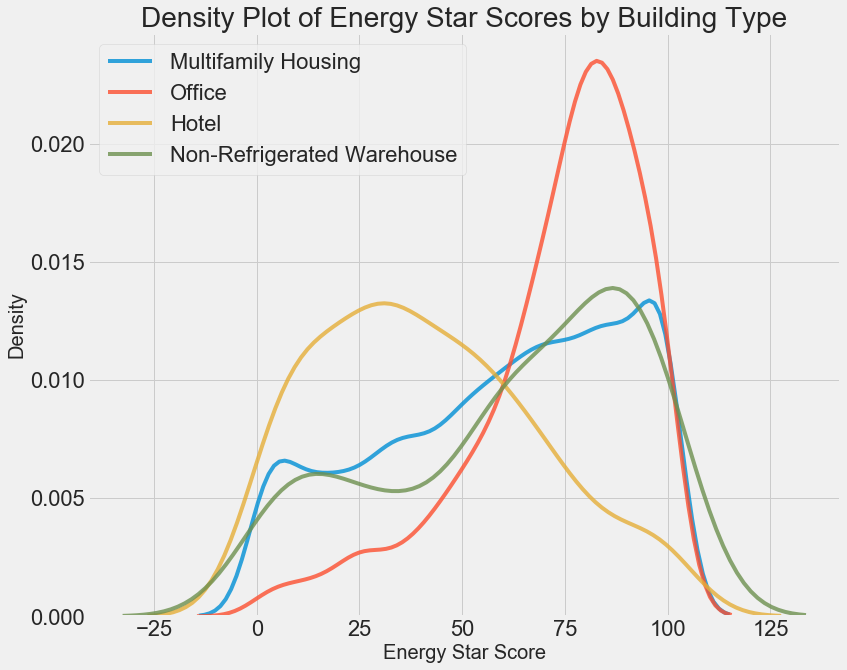

In [18]:
#plot of distribution of scores for building categories
figsize(12,10)

#plot each building type
for b_type in types:
    subset = data[data['Largest Property Use Type']==b_type]
    sns.kdeplot(subset['score'].dropna(),
               label=b_type, shade=False, alpha=0.8)
    plt.xlabel('Energy Star Score', size=20)
    plt.ylabel('Density', size=20)
    plt.title('Density Plot of Energy Star Scores by Building Type', size = 28)

In [19]:
#create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values>100].index)

Text(0.5, 1.0, 'Density plot of Energy start scores by borough')

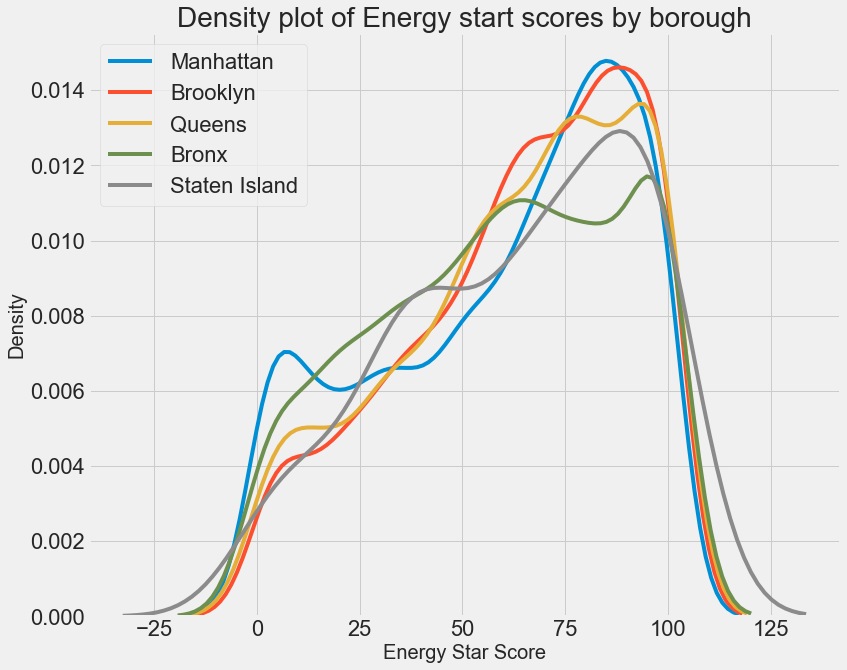

In [20]:
#Plt density plot for each borough type
for borough in boroughs:
    subset = data[data['Borough']==borough]
    sns.kdeplot(subset['score'].dropna(), label=borough)
    
plt.xlabel('Energy Star Score', size=20)
plt.ylabel('Density', size=20)
plt.title('Density plot of Energy start scores by borough', size=28)

In [21]:
#Correlations between features and target
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

#Print the most positive correlations
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

In [22]:
#To account for possible non-linear relationships, we can take square root and natural log transformations of the features 
#and then calculate the correlation coefficients with the score. To try and capture any possible relationships 
#between the borough or building type (remember these are categorical variables) and the score we will have to one-hot encode these columns.

#select the numeric columns
numeric_subset = data.select_dtypes('number')

#create colums with square root and log of numeric columnns
for col in numeric_subset.columns:
    if col =='score':
        next
    else:
        numeric_subset['sqrt_'+col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_'+col] = np.log(numeric_subset[col])

#select categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]
#print(categorical_subset.head(10))

#one hot encode
categorical_subset = pd.get_dummies(categorical_subset)
#print(categorical_subset.head(10))

#join two dataframes using concat
features = pd.concat([numeric_subset, categorical_subset], axis=1)

#drop buildings without energy start score
features = data.dropna(subset=['score'])

print(features.head())
#find correlations with the scor
correlations = features.corr()['score'].dropna().sort_values()

    Order  Property Id                        Property Name  \
12     15      2637863                        Cadman Towers   
18     21      2780056  720-730 Ft. Washington Owners Corp.   
19     22      4988574       - 720 Ft. Washington Ave. bldg   
20     23      4988569        - 730 Ft. Washington Ave bldg   
21     24      2806486                Park 76th Street Inc.   

   Parent Property Id                 Parent Property Name  \
12            2637863                        Cadman Towers   
18            2780056  720-730 Ft. Washington Owners Corp.   
19            2780056  720-730 Ft. Washington Owners Corp.   
20            2780056  720-730 Ft. Washington Owners Corp.   
21            2806486                Park 76th Street Inc.   

          BBL - 10 digits NYC Borough, Block and Lot (BBL) self-reported  \
12  3002320001;3002380035                          3002320001;3002380035   
18  1021800614;1021800628                          1021800614;1021800628   
19             10218

c:\users\rajan\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\rajan\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\rajan\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
correlations.head(15)

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

In [24]:
correlations.tail(15)

Property Id                                          -0.046605
Indirect GHG Emissions (Metric Tons CO2e)            -0.043982
Longitude                                            -0.037455
Occupancy                                            -0.033215
Number of Buildings - Self-reported                  -0.022407
Water Use (All Water Sources) (kgal)                 -0.013681
Water Intensity (All Water Sources) (gal/ft²)        -0.012148
Census Tract                                         -0.002299
DOF Gross Floor Area                                  0.013001
Property GFA - Self-Reported (ft²)                    0.017360
Largest Property Use Type - Gross Floor Area (ft²)    0.018330
Order                                                 0.036827
Community Board                                       0.056612
Council District                                      0.061639
score                                                 1.000000
Name: score, dtype: float64

c:\users\rajan\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Energy Start Score vs Site EUI')

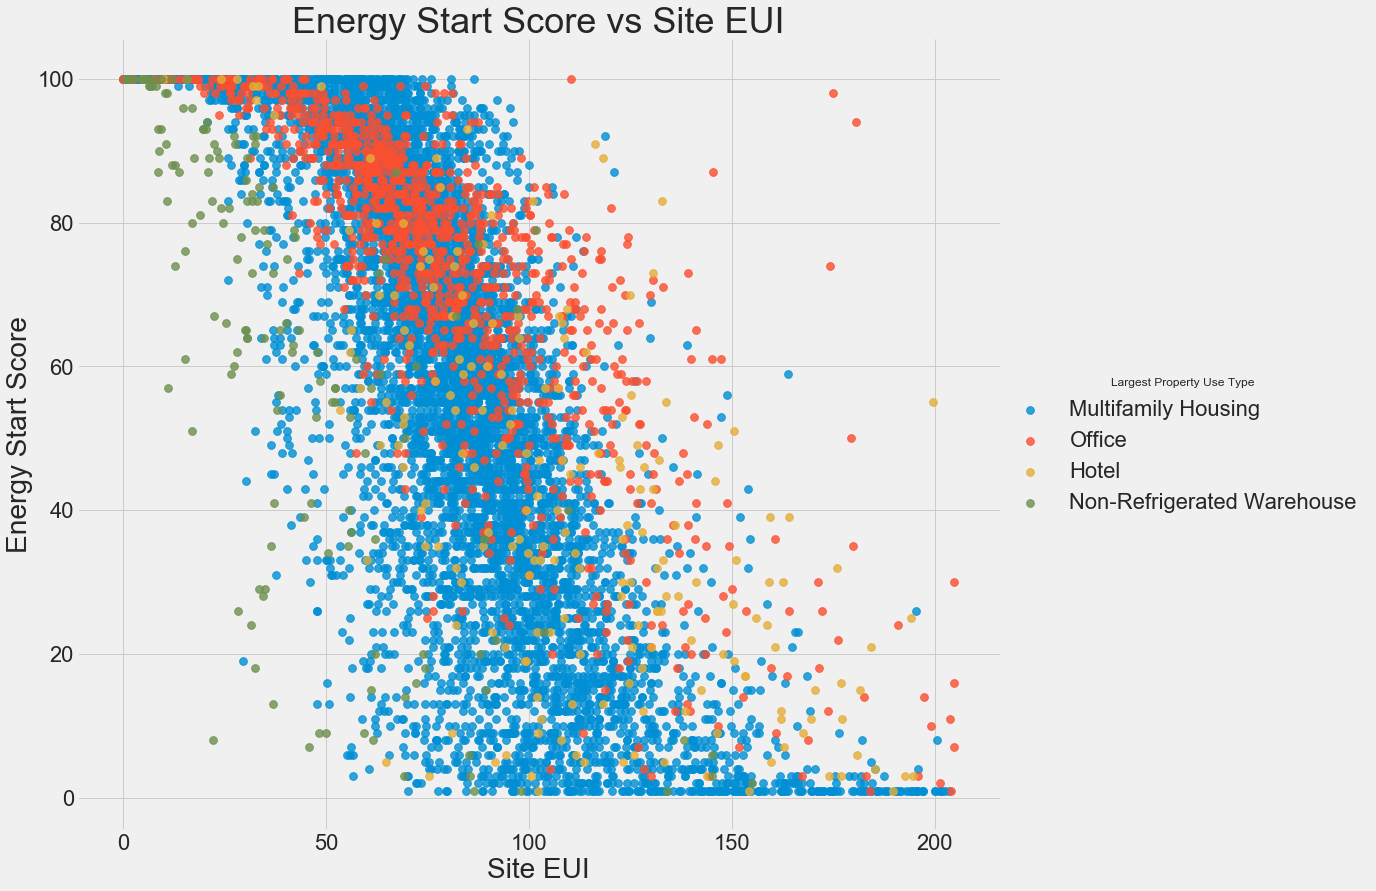

In [25]:
figsize(12, 10)

#extract builing types
features['Largest Property Use Type'] = data.dropna(subset=['score'])['Largest Property Use Type']
         
# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

#use seaborn to plot a scatterplot of score vs lof score eui
sns.lmplot('Site EUI (kBtu/ft²)', 'score', hue='Largest Property Use Type', data=features, 
        scatter_kws={'alpha':0.8, 's':60}, fit_reg=False,
        size=12, aspect=1.2)

#plot lebaling
plt.xlabel('Site EUI', size=28)
plt.ylabel('Energy Start Score', size=28)
plt.title('Energy Start Score vs Site EUI', size=36)

c:\users\rajan\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


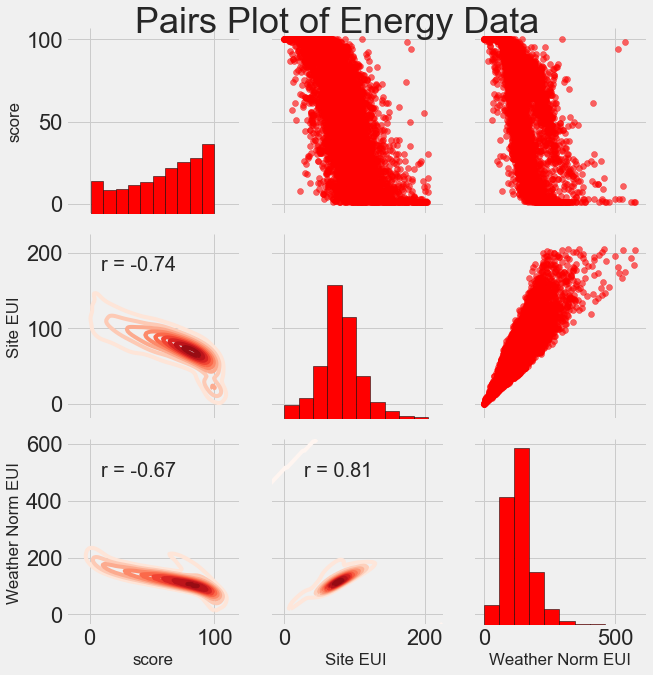

In [26]:
#print(features.head())

# Extract the columns to  plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)']]
                      #log_Total GHG Emissions (Metric Tons CO2e)',
                     #Largest Property Use Type - Gross Floor Area (ft²)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI'})
                                        #log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

# Feature Engineering and Selection
In this section, we will take the following steps for feature engineering:

Select only the numerical variables and two categorical variables (borough and property use type)
Add in the log transformation of the numerical variables
One-hot encode the categorical variables

For feature selection, we will do the following:

Remove collinear features

In [27]:
# Copy the original data
features = data.copy()

#select numeric columns
numeric_subset = data.select_dtypes('number')

#create columns with log of numeric columns
for col in numeric_subset.columns:
    if col=='score':
        next
    else:
        numeric_subset['log_'+col] = np.log(numeric_subset[col])

#select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

#one hot encode
categorical_subset = pd.get_dummies(categorical_subset)

#join two dataframes using concat
#make sure to use axis=1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

(11319, 110)

Text(0.5, 1.0, 'Weather Norm EUI vs Site EUI, R = 0.9968')

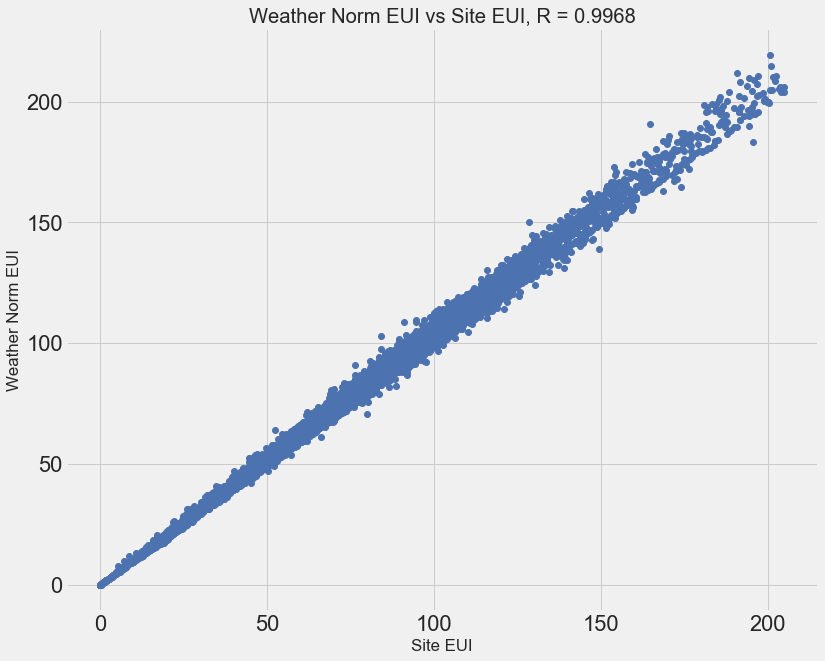

In [28]:
#Remove collinear features
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()
plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI')
plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1])

In [29]:
# The following code removes the collinear features based on a threshold we select for the correlation coefficients 
# by removing one of the two features that are compared. We will use a threshold of 0.6 which removes one of a pair of 
# features if the correlation coefficient between the features exceeds this value.

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    #x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
     #                     'Water Use (All Water Sources) (kgal)'])
                          #'log_Water Use (All Water Sources) (kgal)',])
                          #'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [30]:
features = remove_collinear_features(features, 0.6)
features = features.dropna(axis=1, how='all')
features.shape

c:\users\rajan\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in greater_equal


(11319, 69)

# Split into training and testing sets

In [31]:
# Extract the buildings with no score and the buildings with a score 
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]
print(no_score.shape)
print(score.shape)

(1858, 69)
(9461, 69)


In [32]:
#separate out features and targers
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
fetures = features.replace({np.inf:np.nan, -np.inf:np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6622, 68)
(2839, 68)
(6622, 1)
(2839, 1)


In [33]:
#Metric: Mean Absolute Error

In [34]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true-y_pred))

In [35]:
baseline_guess = np.median(y)
print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5164


In [36]:
# Save the no scores, training, and testing data
no_score.to_csv('data/no_score.csv', index = False)
X.to_csv('data/training_features.csv', index = False)
X_test.to_csv('data/testing_features.csv', index = False)
y.to_csv('data/training_labels.csv', index = False)
y_test.to_csv('data/testing_labels.csv', index = False)

# Compare ML models for performance metrics

In [37]:

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
# from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [76]:
#read in data into dataframes
train_features = pd.read_csv('data/training_features.csv')
test_features = pd.read_csv('data/testing_features.csv')
train_labels = pd.read_csv('data/training_labels.csv')
test_labels = pd.read_csv('data/testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6622, 68)
Testing Feature Size:   (2839, 68)
Training Labels Size:   (6622, 1)
Testing Labels Size:    (2839, 1)


Text(0.5, 1.0, 'energy start score distribution')

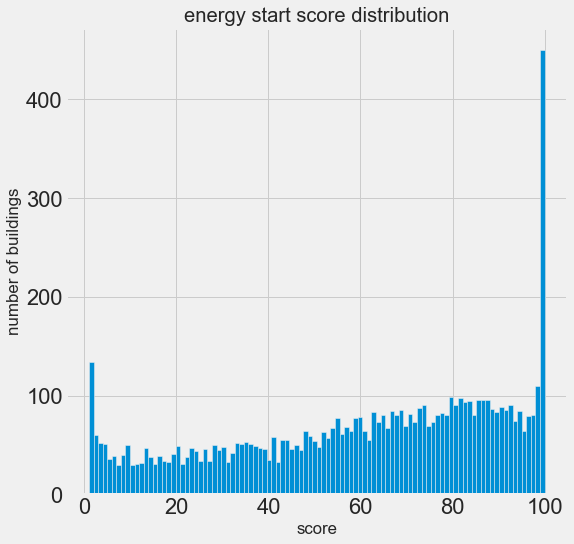

In [77]:
#distribution of energy score
figsize(8,8)
plt.style.use('fivethirtyeight')
plt.hist(train_labels['score'].dropna(), bins=100)
plt.xlabel('score')
plt.ylabel('number of buildings')
plt.title('energy start score distribution')

In [96]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(missing_values=np.nan , strategy = 'median')

#train on the training features
#imputer.fit(train_features)

# transform both training data and testing data
#X = imputer.transform(train_features)
#X_test = imputer.transform(test_features)

#instead of using imputer you can simply use fillna function to fill na values with median values
train_features.fillna(train_features.median(), inplace=True)
X=train_features
test_features.fillna(train_features.median(), inplace=True)
X_test = test_features
print('Missing values in training features: ', X.isnull().values.any())
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

Missing values in training features:  False
Missing values in testing features:   Order                                                            0
Property Id                                                      0
DOF Gross Floor Area                                             0
Largest Property Use Type - Gross Floor Area (ft²)               0
Year Built                                                       0
                                                                ..
Largest Property Use Type_Strip Mall                             0
Largest Property Use Type_Supermarket/Grocery Store              0
Largest Property Use Type_Urgent Care/Clinic/Other Outpatient    0
Largest Property Use Type_Wholesale Club/Supercenter             0
Largest Property Use Type_Worship Facility                       0
Length: 68, dtype: int64
(array([], dtype=int32), array([], dtype=int32))
(array([], dtype=int32), array([], dtype=int32))


In [97]:
##Replace inf, =-inf with na and then fill na with medians
#print(X.isnull().any())
#print(np.sum(np.isnan(X)))
#np.any(np.isnan(X))
print(np.all(np.isfinite(X)))
X.replace('#NAME?', np.nan)
X.replace('=-inf', np.nan)
#X.dropna()
#X.fillna(X.median(), inplace=True)
print(np.all(np.isfinite(X)))
X.to_csv('data/X_nan_inf_removed.csv', index = False)

True
True


In [99]:
#Scaling features/ normalization
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X=scaler.transform(X)
X_test=scaler.transform(X_test)
#X_test = np.array(test_labels)
#X.to_csv('data/X_inconsistent.csv', index = False)

In [100]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
#train_labels.to_csv('data/y_inconsistent.csv', index = False)
y_test = np.array(test_labels).reshape((-1, ))

In [101]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

#takes in the model, trains the model and evaluates the model on the test set
def fit_and_evaluate(model):
    model.fit(X, y)
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    return model_mae

In [102]:
#Linear Regression
lr= LinearRegression()
lr_mae = fit_and_evaluate(lr)
print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 13.4352


In [103]:
#SVM
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 10.6793


In [106]:
#random forrest
random_forrest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forrest)
print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 9.5473


In [109]:
#gradient boosted regression
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae= fit_and_evaluate(gradient_boosted)
print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 10.0204


In [110]:
#K nearest neighbors
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)
print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 12.8081


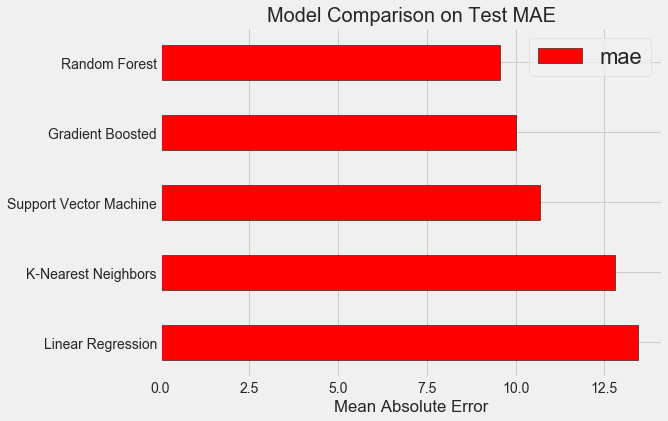

In [111]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

# Model Optimization/ Hyper Paramater Tuning

In [112]:
#we do hyper paramater tuning for gradient boosting regressor
#loff function to be prioritized
loss= ['ls', 'lad', 'huber']

#number of trees used in boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# max depth of each tree
max_depth = [1,3,5,10,15]

# in number of samples per leaf
min_samples_leaf = [1,2,4,6,8]

# min number of samples to split a node
min_samples_split = [2,4,6,10]

#max number of features to split a node
max_features = ['auto', 'sqrt', 'log2', None]

#define the grid of hyper parameters to search
hyperparameter_grid = {'loss':loss,
                      'n_estimators': n_estimators,
                      'min_samples_leaf': min_samples_leaf,
                      'min_samples_split': min_samples_split,
                      'max_features':max_features}


In [113]:
#createa the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state=42)

#set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25,
                               scoring='neg_mean_absolute_error',
                               n_jobs = -1, verbose=1,
                               return_train_score=True,
                               random_state=42)

In [114]:
#fit the training data
random_cv.fit(X,y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.3min finished


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [116]:
#get all of cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)
random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
18,56.232890,0.565729,0.036753,0.000468,1100,10,2,auto,huber,"{'n_estimators': 1100, 'min_samples_split': 10...",-9.077358,-8.995093,-9.399055,-9.167721,-9.159807,0.151022,1,-5.516787,-5.754393,-5.201942,-5.219470,-5.423148,0.228532
0,52.230208,1.010351,0.035692,0.001046,1100,10,6,None,huber,"{'n_estimators': 1100, 'min_samples_split': 10...",-8.980871,-8.992932,-9.402201,-9.271524,-9.161882,0.181027,2,-5.402349,-6.413154,-5.275476,-5.294278,-5.596314,0.474081
13,75.658996,1.038940,0.051420,0.001843,1500,4,4,auto,huber,"{'n_estimators': 1500, 'min_samples_split': 4,...",-9.051081,-8.937705,-9.480142,-9.205841,-9.168692,0.203450,3,-4.673858,-4.585146,-4.507136,-4.445787,-4.552982,0.085496
4,48.884859,0.901883,0.036417,0.001189,1100,10,4,auto,ls,"{'n_estimators': 1100, 'min_samples_split': 10...",-9.127592,-9.062876,-9.657557,-9.358520,-9.301636,0.233031,4,-5.291013,-5.318894,-5.174777,-5.233336,-5.254505,0.055416
3,71.716928,0.569646,0.042457,0.000525,1500,10,2,auto,lad,"{'n_estimators': 1500, 'min_samples_split': 10...",-9.359281,-9.132681,-9.473505,-9.414312,-9.344944,0.129036,5,-8.312800,-7.940258,-7.581770,-8.296868,-8.032924,0.300051
6,51.494746,0.227319,0.044599,0.009628,1100,2,2,None,ls,"{'n_estimators': 1100, 'min_samples_split': 2,...",-9.121694,-9.184749,-9.700423,-9.488786,-9.373913,0.234095,6,-5.226504,-5.305400,-5.081114,-5.139886,-5.188226,0.085154
11,69.264629,0.530069,0.051574,0.000766,1500,2,4,auto,ls,"{'n_estimators': 1500, 'min_samples_split': 2,...",-9.279348,-9.179436,-9.659759,-9.400825,-9.379842,0.179621,7,-4.533142,-4.492618,-4.438974,-4.405916,-4.467663,0.048852
23,51.601763,0.400210,0.030131,0.001633,1500,2,4,None,ls,"{'n_estimators': 1500, 'min_samples_split': 2,...",-9.279348,-9.179436,-9.659759,-9.400825,-9.379842,0.179621,7,-4.533142,-4.492618,-4.438974,-4.405916,-4.467663,0.048852
12,69.736265,0.366165,0.061585,0.012027,1500,4,4,auto,ls,"{'n_estimators': 1500, 'min_samples_split': 4,...",-9.279348,-9.179436,-9.659759,-9.400825,-9.379842,0.179621,7,-4.533142,-4.492618,-4.438974,-4.405916,-4.467663,0.048852
7,16.718846,0.321979,0.052782,0.000540,1500,6,6,sqrt,huber,"{'n_estimators': 1500, 'min_samples_split': 6,...",-9.324045,-9.038507,-9.709996,-9.514195,-9.396686,0.247760,10,-5.869653,-6.002158,-5.787127,-5.782457,-5.860349,0.088917


In [117]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='huber', max_features='auto', min_samples_leaf=2,
                          min_samples_split=10, n_estimators=1100,
                          random_state=42)

In [119]:
#create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss='lad', max_depth=5,
                                 min_samples_leaf=6,
                                 min_samples_split=6,
                                 max_features = None,
                                 random_state=42)

#grid search object using the trees range and random forest model
grid_search = GridSearchCV(estimator=model, param_grid=trees_grid, cv=4,
                          scoring='neg_mean_absolute_error', verbose=1,
                          n_jobs=-1, return_train_score= True)

In [120]:
#fit the grid search
grid_search.fit(X,y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.2min finished


GridSearchCV(cv=4,
             estimator=GradientBoostingRegressor(loss='lad', max_depth=5,
                                                 min_samples_leaf=6,
                                                 min_samples_split=6,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Text(0.5, 1.0, 'Performance vs number of trees')

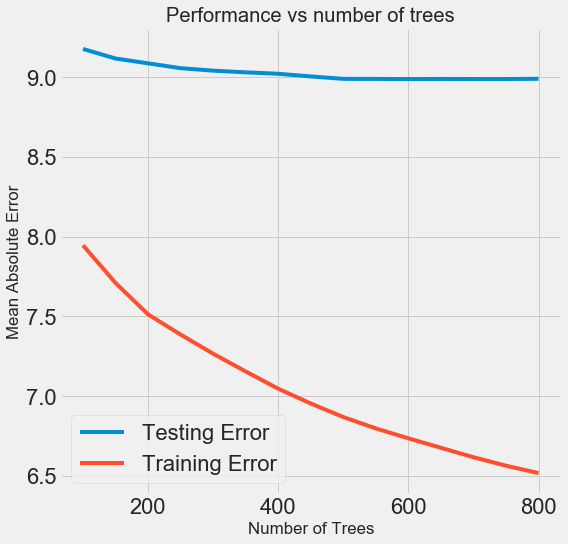

In [122]:
#get the results into dataframe
results = pd.DataFrame(grid_search.cv_results_)

#plot training and testing error vs number of trees
figsize(8,8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1*results['mean_test_score'], label='Testing Error')
plt.plot(results['param_n_estimators'], -1*results['mean_train_score'], label='Training Error')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Performance vs number of trees')

In [123]:
results.sort_values('mean_test_score', ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
10,48.302342,0.589019,0.029252,0.001152,600,{'n_estimators': 600},-8.807716,-8.762952,-9.318551,-9.062081,-8.987825,0.222430,1,-6.774837,-6.944910,-6.471116,-6.749528,-6.735098,0.169923
13,60.916019,0.952875,0.028137,0.001915,750,{'n_estimators': 750},-8.811484,-8.762560,-9.297621,-9.080604,-8.988067,0.215883,2,-6.628029,-6.772074,-6.324296,-6.529434,-6.563458,0.162824
12,60.020900,1.511025,0.035156,0.001589,700,{'n_estimators': 700},-8.809895,-8.760483,-9.306858,-9.075363,-8.988150,0.219538,3,-6.668002,-6.816285,-6.377984,-6.604435,-6.616677,0.157798
11,54.704282,0.211649,0.031083,0.001363,650,{'n_estimators': 650},-8.809919,-8.759644,-9.313842,-9.071084,-8.988622,0.221886,4,-6.726079,-6.897647,-6.426083,-6.653025,-6.675708,0.169279
9,43.931448,0.399845,0.027183,0.001076,550,{'n_estimators': 550},-8.809810,-8.766303,-9.317448,-9.061037,-8.988650,0.220664,5,-6.821714,-7.027928,-6.520655,-6.818776,-6.797268,0.180817


# Evaluate final model on test data

In [125]:
#default model
default_model=GradientBoostingRegressor(random_state=42)

#select the best model
final_model = grid_search.best_estimator_
final_model

GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6,
                          min_samples_split=6, n_estimators=600,
                          random_state=42)

In [126]:
%%timeit -n 1 -r 5
default_model.fit(X,y)

2.56 s ± 25.7 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [127]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

26.5 s ± 64 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [128]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)
print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 10.0225.
Final model performance on the test set:   MAE = 9.1349.


Text(0.5, 1.0, 'Test values and predictions')

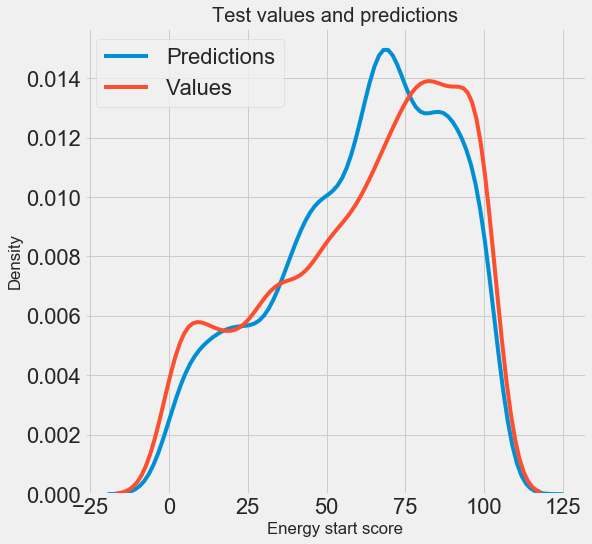

In [129]:
figsize(8,8)

#density plot of final predictions and test values
sns.kdeplot(final_pred, label='Predictions')
sns.kdeplot(y_test, label='Values')

#label the plot
plt.xlabel('Energy start score')
plt.ylabel('Density')
plt.title('Test values and predictions')

Text(0.5, 1.0, 'Distribution of Residuals')

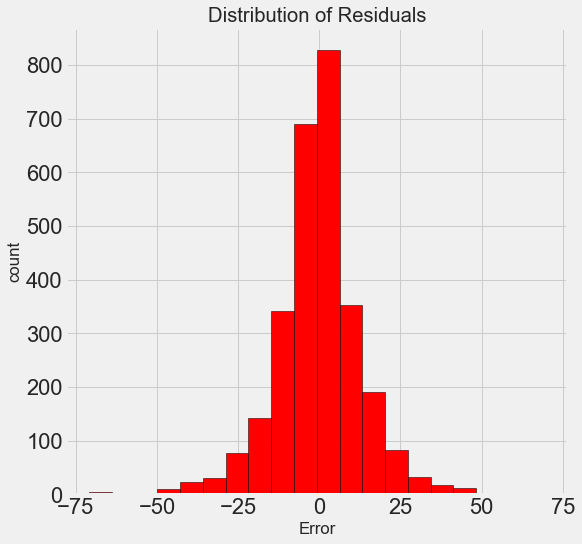

In [131]:
figsize=(6,6)

#calculate residuals
residuals = final_pred - y_test

#plot residuals in a histogram
plt.hist(residuals, color='red', bins=20, edgecolor='black')
plt.xlabel('Error')
plt.ylabel('count')
plt.title('Distribution of Residuals')

# Interpret the model results

In [154]:
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import lime
import lime.lime_tabular

In [155]:
#Read the data
train_features = pd.read_csv('data/training_features.csv')
test_features = pd.read_csv('data/testing_features.csv')
train_labels = pd.read_csv('data/training_labels.csv')
test_labels = pd.read_csv('data/testing_labels.csv')
train_features.fillna(train_features.median(), inplace=True)
test_features.fillna(test_features.median(), inplace=True)

In [136]:
#Recreate final model

#create imputer obect with median filling strategy
imputer = SimpleImputer(strategy='median')

#train on training features
imputer.fit(train_features)

#transform both training and testing data
X = imputer.transform(train_features)
x_test = imputer.transform(test_features)

#sklearn wants labels as one dim vectors
y = np.array(train_labels).reshape((-1,))
y_test = np.array(test_labels).reshape((-1,))

In [137]:
def mae(y_true, y_pred):
    return np.mean(y_true - y_pred)

In [139]:
model = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                min_samples_leaf=6, min_samples_split=6,
                                n_estimators=800, random_state=42)
model.fit(X,y)

GradientBoostingRegressor(loss='lad', max_depth=5, min_samples_leaf=6,
                          min_samples_split=6, n_estimators=800,
                          random_state=42)

In [140]:
#make predictions on the test set
model_pred = model.predict(X_test)
print('Final Model Performance on the test set: MAE = %0.4f' % mae(y_test, model_pred))

Final Model Performance on the test set: MAE = -40.3432


In [141]:
#We will explore several ways to interpret our model:
    #Feature importances
    #Locally Interpretable Model-agnostic Explainer (LIME)
    #Examining a single decision tree in the ensemble.

In [142]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(train_features.columns), 
                                'importance': model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,Weather Normalized Site EUI (kBtu/ft²),0.332291
1,Site EUI (kBtu/ft²),0.228613
2,Weather Normalized Site Electricity Intensity ...,0.131942
3,Largest Property Use Type_Non-Refrigerated War...,0.033876
4,Property Id,0.029216
5,log_Water Use (All Water Sources) (kgal),0.024625
6,Largest Property Use Type_Multifamily Housing,0.023706
7,Water Use (All Water Sources) (kgal),0.021468
8,Largest Property Use Type - Gross Floor Area (...,0.019894
9,DOF Gross Floor Area,0.019331


Text(0.5, 1.0, 'feature importances from random forrest')

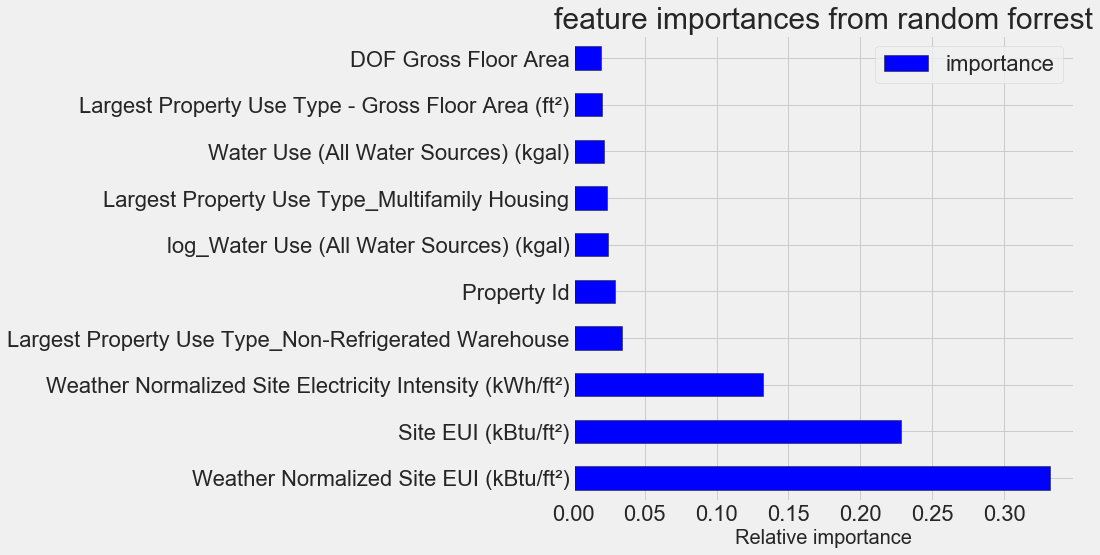

In [146]:
figsize=(10,10)
plt.style.use('fivethirtyeight')
#plot the most important features in a horizontal bard chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue')
plt.xlabel('Relative importance', size=20)
plt.ylabel('')
plt.title('feature importances from random forrest', size=30)

In [147]:
#Use feature importances for feature selection
most_important_features = feature_results['feature'][:10]

#find index that corresponds to each feature name
indices = [list(train_features.columns).index(x) for x in most_important_features]

#keep only the most important features
X_reduced = X[:,indices]
X_test_reduced = X_test[:, indices]

print('most important training features shape: ', X_reduced.shape)
print('most important testing features shape: ', X_test_reduced.shape)

most important training features shape:  (6622, 10)
most important testing features shape:  (2839, 10)


In [148]:
lr = LinearRegression()
#fit on fulll set of features
lr.fit(X, y)
lr_full_pred = lr.predict(X_test)

# fit on reduced set of features
lr.fit(X_reduced, y)
lr_reduced_pred = lr.predict(X_test_reduced)

#display results
print('Linear Regression Full Results: MAE =    %0.4f.' % mae(y_test, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mae(y_test, lr_reduced_pred))


Linear Regression Full Results: MAE =    1219.4296.
Linear Regression Reduced Results: MAE = -57.8291.


In [149]:
# Create the model with the same hyperparamters on most important features
model_reduced = GradientBoostingRegressor(loss='lad', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

# Fit and test on the reduced set of features
model_reduced.fit(X_reduced, y)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mae(y_test, model_reduced_pred))

Gradient Boosted Reduced Results: MAE = -39.2334


In [151]:
#Locally interpretable model-agnostic explanations
#find residuals
residuals = abs(model_reduced_pred - y_test)
#exact the worst and best prediction
wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

In [156]:
#create lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_reduced, mode='regression', training_labels=y,
                                                  feature_names = list(most_important_features))

Prediction: 100.7217
Actual Value: 1.0000


Text(0.5, 0, 'effect on prediction')

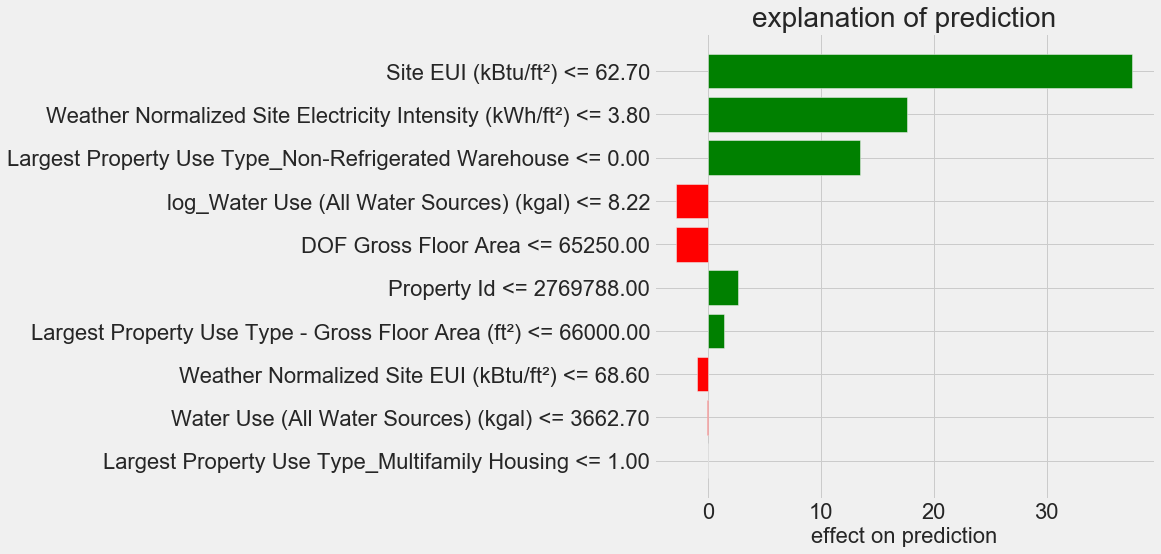

In [158]:
#display predicted and true value for wrong instances
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

#explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row=wrong, 
                                      predict_fn=model_reduced.predict)

#plot prediction explaination
wrong_exp.as_pyplot_figure()
plt.title('explanation of prediction', size=28)
plt.xlabel('effect on prediction', size=22)

In [159]:
wrong_exp.show_in_notebook(show_predicted_value=False)

Prediction: 100.2357
Actual Value: 100.0000


Text(0.5, 0, 'effect on prediction')

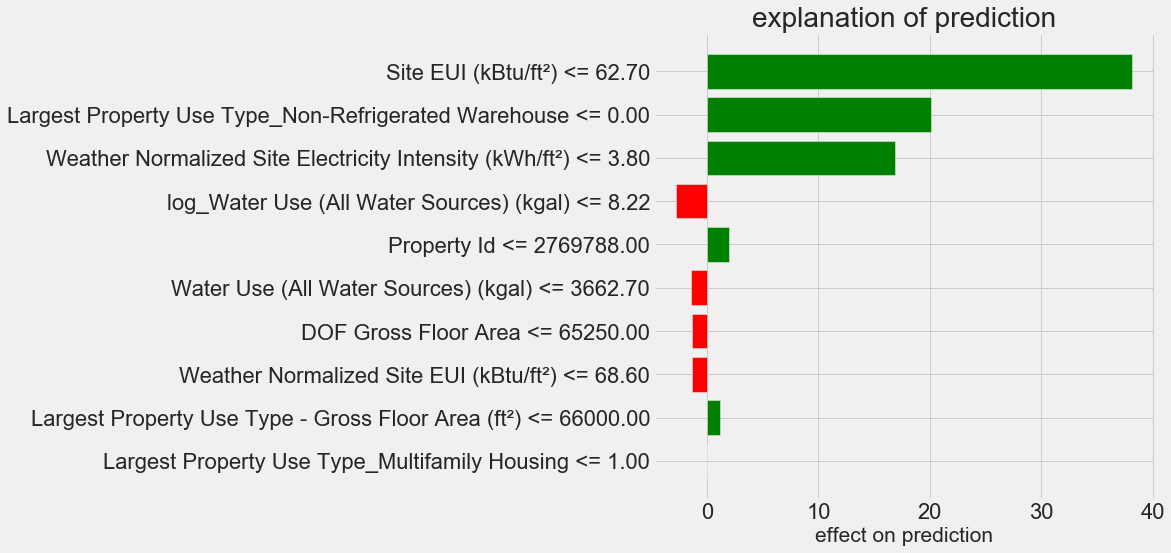

In [160]:
#display the predicted and true valye for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

right_exp = explainer.explain_instance(right, model_reduced.predict, num_features=10)
right_exp.as_pyplot_figure()
plt.title('explanation of prediction', size=28)
plt.xlabel('effect on prediction', size=21)